# Regression by NN

### Import

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

### 訓練データ（ランダムなサンプル）作成

In [128]:
# sample
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

inputs = np.column_stack((xs,zs))

In [129]:
print(xs.shape)
print(zs.shape)
print(inputs.shape)

(1000, 1)
(1000, 1)
(1000, 2)


### ターゲットの作成

In [130]:
# sample
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### 訓練データのプロット
散布図をみて、線形の関係があることを確認する

In [131]:
# # targets = targets.reshape(observations,1)
# targets = np.array(targets)

# fig = plt.figure()
# ax = fig.add_subplot(111,projection = '3d')

# ax.plot(xs,zs,targets)

# ax.set_xlabel('xs')
# ax.set_ylabel('zs')
# ax.set_zlabel('Targets')

# ax.view_init(azim = 100)

# plt.show()


### 変数の初期値の設定
 - 重み
 - バイアス

In [132]:
# sample
init_range = 0.1

# np.random.seed(0.1)
weights = np.random.uniform(low = -init_range, high = init_range, size = (2,1))
biases =  np.random.uniform(low = -init_range, high = init_range, size = 1)

print(weights)
print(biases)

[[-0.06950561]
 [ 0.09214536]]
[-0.07730701]


### 学習率の設定

In [133]:
# 勾配降下法で調整する
learning_rate = 0.02

### モデルの訓練

In [137]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs -targets
    
    loss = np.sum(deltas **2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

### 重みとバイアスの出力

In [138]:
print(weights,biases)

[[ 2.00374274]
 [-3.00204889]] [4.98895799]


### ターゲットと比較する

In [127]:
#100回
# targets = 2*xs - 3*zs + 5 + noise
print(abs(weights[0]) - 2)
print(abs(weights[1]) - 3)
print(abs(biases) - 5)

[-0.00031451]
[-0.00073087]
[-0.67110148]


### 最終的な出力とターゲットのグラフ

<function matplotlib.pyplot.show(close=None, block=None)>

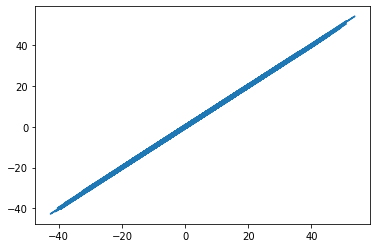

In [142]:
plt.plot(outputs,targets)
plt.show